# Analyze & Probe Datasets

In this notebook, we will introduce how to analyze and probe given datasets using Data-Juicer Analyzer tools. By using the Analyzer, we can obtain statistical information about the dataset and use these statistics to set and refine parameters in the data recipes.

**Note:** Analyzer only computes and analyze the stats of Filter operators. It doesn't work for Mappers, Deduplicators, and Selectors.

Similar to data processing, we can run `analyze_data.py` tool or `dj-analyze` command with your config as the argument to analyze your dataset. Both of them use `Analyzer` to finish the analysis.

```shell
# only for installation from source
python tools/analyze_data.py --config your_recipe.yaml

# use command line tool
dj-analyze --config your_recipe.yaml
```

Here, we will show you how to analyze your dataset.

We will also use the demo dataset in Data-Juicer in this example.

First, we need to prepare a data recipe for analyzing the dataset, which includes Filters with stats we care about.

For example, if we want to check the distribution of text length of this dataset, we only need to add `text_length_filter` OP in the OP list. Because we won't filter out any samples in the dataset, we don't need to set the thresholds of this OP. And for convenience, we save all analysis results into one figure file.

In [1]:
recipe_str = """
project_name: 'analyze_a_dataset'
dataset_path: '../demos/data/demo-dataset.jsonl'  # path to your dataset directory or file
np: 1  # number of subprocess to process your dataset

export_path: './outputs/analyze_result/res.jsonl'
save_stats_in_one_file: true

# process schedule
# a list of several process operators with their arguments
process:
  - text_length_filter:                                     # filter text with length out of specific range
"""

analyze_recipe = 'analyze_recipe.yaml'
with open(analyze_recipe, 'w') as f:
    f.write(recipe_str)

Now let's begin to analyze the dataset with `Analyzer` directly.

In [2]:
# load recipe
from data_juicer.config import init_configs
from data_juicer.core import Analyzer

cfg = init_configs(args=f'--config {analyze_recipe}'.split())

analyzer = Analyzer(cfg)
analyzer.run()

/usr/local/python310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-08 17:18:55 | INFO     | data_juicer.config.config:618 - Back up the input config file [/root/projects/kdd_tutorial_notebooks/analyze_recipe.yaml] into the work_dir [/root/projects/kdd_tutorial_notebooks/outputs/analyze_result]
2024-08-08 17:18:55 | INFO     | data_juicer.config.config:640 - Configuration table: 
╒═════════════════════════╤═══════════════════════════════════════════════════════════════════════════╕
│ key                     │ values                                                                    │
╞═════════════════════════╪═══════════════════════════════════════════════════════════════════════════╡
│ config                  │ [Path_fr(analyze_recipe.yaml, cwd=/root/projects/kdd_tutorial_notebooks)] │
├─────

Dataset({
    features: ['text', 'meta', '__dj__stats__'],
    num_rows: 6
})

<Figure size 800x600 with 0 Axes>

After the analysis is complete, we can view the statistical information of the dataset.

In [3]:
import os
import pandas as pd
overall_file = os.path.join(analyzer.analysis_path, 'overall.csv')
if os.path.exists(overall_file):
    analysis_res = pd.read_csv(overall_file)

analysis_res

,Unnamed: 0,text_len
0,count,6.000000
1,mean,39.500000
2,std,34.795115
3,min,8.000000
4,25%,13.750000
5,50%,32.500000
6,75%,49.750000
7,max,101.000000


Display the histogram of statistics of dataset

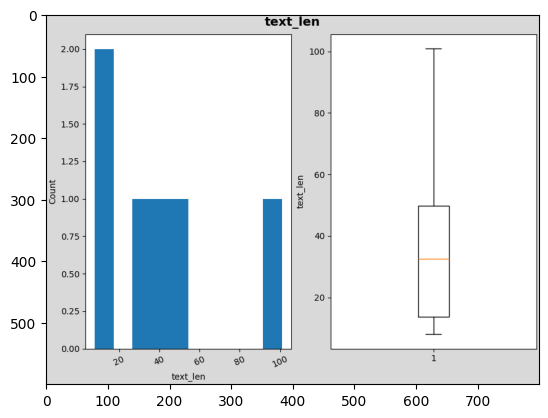

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

if os.path.exists(analyzer.analysis_path):
    for f_path in os.listdir(analyzer.analysis_path):
        if '.png' in f_path and 'all-stats' in f_path:
            all_stats = os.path.join(analyzer.analysis_path, f_path)
            break

img = mpimg.imread(all_stats) 
plt.imshow(img)
plt.show()

Finally, clean up the example recipe.

In [5]:
!rm analyze_recipe.yaml

# Conclusion

In this notebook, we learn how to analyze a dataset on Filter stats we care about with the `Analyzer` tool, and how to check the analysis results.